In [43]:
import pandas as pd             #imports the pandas library and renames it as "pd".
import matplotlib.pyplot as plt #imports the matplotlib library and renames the "pyplot" module as "plt"
import seaborn as sns           #imports the seaborn library, which is a data visualization library that provides an interface for creating attractive and informative statistical graphics.
import re                       #regular expression library that provides powerful tools for pattern matching and string manipulation.

In [44]:
import nltk                    #nltk library provides tools and resources for working with human language data.
nltk.download()                #This function opens a GUI (graphical user interface) that allows the user to select which data and resources they want to download from the nltk library.
from nltk.corpus import stopwords  # imports the stopwords corpus from the nltk library. The stopwords corpus is a collection of common stopwords for different languages that can be used to remove these words from text data.
from nltk.stem import WordNetLemmatizer  # Lemmatization is the process of reducing a word to its base or root form, which can be useful for reducing the number of unique words in a text corpus. 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [45]:
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer is a method for converting text data into a matrix of token counts, which is a common way of representing text data in machine learning applications.
from sklearn.model_selection import GridSearchCV            #GridSearchCV is a method for tuning hyperparameters of a machine learning model using a grid search over a specified parameter space.
from sklearn.ensemble import RandomForestClassifier         #imports the RandomForestClassifier class from the sklearn.ensemble module. RandomForestClassifier is a type of ensemble learning algorithm that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting.

In [46]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report 

# imports several metrics classes from the sklearn.metrics module.
#These classes are used to evaluate the performance of machine learning models.
#BRIEF DESCRIPTION :--
#accuracy score: Returns the classification score for accuracy.
#precision score: Returns the precision score, which is the percentage of true positive predictions among all positive predictions.
#recall score: Returns the recall score, which is the percentage of true positive predictions among all actual positives.
#confusion matrix: Creates a table that summarises the number of true positives, true negatives, false positives, and false negatives.
#roc curve: This function computes the receiver operating characteristic (ROC) curve, which is a plot of the true positive rate versus the false positive rate for various classification thresholds.
#classification report: Generates a text summary of a classification problem's precision, recall, and F1 score for each class.

In [47]:
#loading the dataset--
df=pd.read_csv(r"C:\Users\milly\AISC_1006\final_dataset_for_training_sentiment_analysis.csv")

In [48]:
print("Shape of the DataFrame:",df.shape) 
df.head(10)                               
#df.head() helps in printing the first few rows of the dataframe

Shape of the DataFrame: (10000, 3)


,text,output,reviews_title
0,"This hotel was nice and quiet. Did not know, t...",3.0,Best Western Plus Hotel
1,"quite good, quite sufficient, quite well",4.0,Clean rooms at solid rates in the heart of Carmel
2,We stayed in the king suite with the separatio...,3.0,Business
3,"Parking was horrible, somebody ran into my ren...",5.0,Very good
4,Not cheap but excellent location. Price is som...,2.0,Low chance to come back here
5,If you get the room that they advertised on th...,4.0,Loved staying here
6,"This is such a fun, lovely hotel. The attentio...",1.0,Does not live up to its reputation
7,We recently stayed at this hotel on a trip to ...,1.0,worst customer service ever
8,"I reserved a room a week in advance, knowing a...",5.0,Location Location Location
9,MoreMore,1.0,The worst place i've booked


In [49]:
# Check for missing values in rows
missing_values_rows = df.isnull().sum(axis=1) #using the isnull() method to create a boolean mask that indicates where the missing values are, and then use the sum() method to count the number of missing values in each row.
missing_values_rows

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    2
Length: 10000, dtype: int64

In [50]:
df = df.dropna() #dropping the rows which has null values in rows

In [51]:
print("Shape of the DataFrame:",df.shape) #againg printing the shape to determine how many rows we have lost.

Shape of the DataFrame: (9999, 3)


C:\Users\milly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

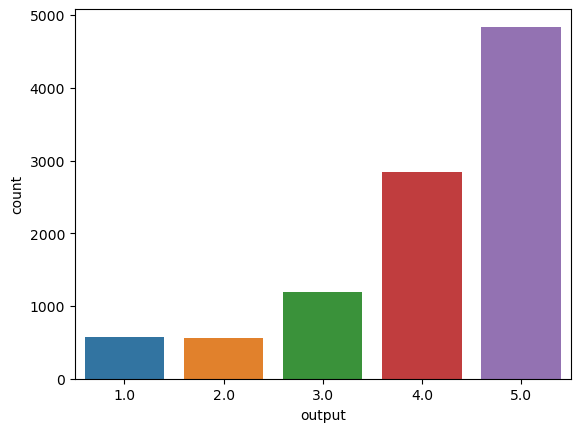

In [52]:
sns.countplot(df.output) # countplot() helps in creating a bar plot of the counts of unique values in the output column of a Pandas DataFrame, df.

In [53]:
#After visualising the dataframe, we can see that numbers in 'output' column represents the rating, so converting them into sentiment using replace() func. 
df['output'].replace([1,2,3,4,5], ['negative','negative','neutral','positive','positive'], inplace=True) 
#This can make the data more interpretable and easier to work with in subsequent analysis.

In [54]:
# Encoding/ or replacing again as the machine can take numbers and not words. 
#Encoding with respect to our needs and for easy visualisation. 
df['output'].replace(['positive','neutral','negative'], [ 1, 2, 3],inplace= True)

C:\Users\milly\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output', ylabel='count'>

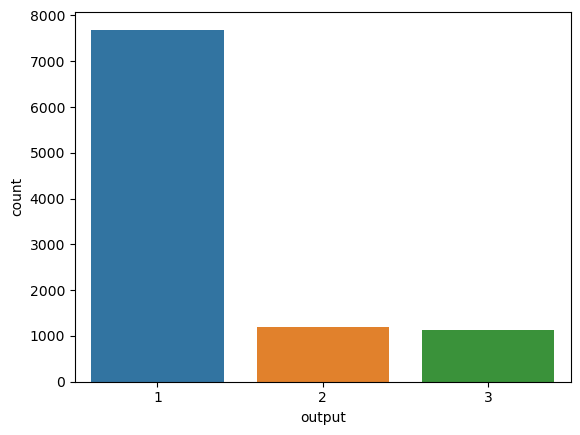

In [55]:
sns.countplot(df.output)
#again plotting to see how much are the positive reviews. 

In [56]:
#creating an object of the WordNetLemmatizer class, which can be used to perform lemmatization on words in text data.
lm = WordNetLemmatizer() 

In [57]:
'''
# FIRST LINE MEANING IN FOR LOOP:-
This is a regular expression operation in Python using the re module. It replaces all non-alphabetic characters in a given string (str(item)) with a space character.
Here is what each component of the operation does:
re is a built-in module in Python that provides support for regular expressions.
sub is a function in the re module that substitutes one or more occurrences of a pattern in a string with another string.
[^a-zA-Z] is a regular expression pattern that matches any character that is not an uppercase or lowercase letter from A to Z. The ^ symbol inside the square brackets means negation, i.e., it matches anything except for the letters A to Z (both lowercase and uppercase).
' ' is the string that is used as a replacement for the matched pattern. In this case, all non-alphabetic characters are replaced with a space character.
So, the operation re.sub('[^a-zA-Z]',' ',str(item)) effectively removes all non-alphabetic characters from str(item) and replaces them with spaces.

# FOURTH LINE MEANING IN FOR LOOP:-
The if statement filters out any words that are stopwords in English.
The stopwords module from the nltk library is used to create a set of stopwords, which are words that are common in text but usually do not carry much meaning (e.g., "a", "an", "the").
'''

def text_transformation(df_col):
    corpus = []  #A new empty list, corpus, is created to store the transformed text data.
    for review in df_col:
        new_review = re.sub('[^a-zA-Z]',' ',str(review))
        new_review = new_review.lower() #transformed text data is then converted to lowercase 
        new_review = new_review.split() #transformed text data is then split into individual words
        new_review = [lm.lemmatize(word) for word in new_review if word not in set(stopwords.words('english'))] 
        corpus.append(' '.join(str(x) for x in new_review)) #The lemmatized and filtered words are then joined back into a single string using the join() method, with a space as the separator. The resulting string is added to the corpus list using the append() method.
    return corpus  #returns the list of transformed text data, corpus.

In [58]:
corpus = text_transformation(df['reviews_title']) #performing text preprocessing on DataFrame column named 'reviews_title' by applying the function text_transformation() which is defined in the above code.

In [59]:
corpus  #printing corpus to see the transformed data after doing text_transformation()

['best western plus hotel',
 'clean room solid rate heart carmel',
 'business',
 'good',
 'low chance come back',
 'loved staying',
 'live reputation',
 'worst customer service ever',
 'location location location',
 'worst place booked',
 'beautiful hotel',
 'good location',
 'construction extremely accomodating',
 'hot water bad food',
 'excellent hotel',
 'historic uncomfortable',
 'accomations',
 'great room great location',
 'good location clean poor service restaurant',
 'great value good location',
 'excellent',
 'good hotel good location',
 'beautiful hotel',
 'nice reasonable',
 'great hotel fantastic service',
 'whitney',
 'horrible closet like room air conditioning',
 'second chance stay',
 'non recommanded stay',
 'nice visit nola',
 'valet parking stole car',
 'disappointing experience',
 'best weekend ever',
 'great hotel experience',
 'great service staff hotel need update',
 'convenient clean quiet',
 'beauty best',
 'new orleans hospitality finest',
 'good location',
 '

In [60]:
cv = CountVectorizer(ngram_range=(1,2))
#The CountVectorizer constructor takes several parameters, including the ngram_range parameter which specifies the range of n-grams to be used for tokenization. In this case, ngram_range=(1,2) means that both single words (unigrams) and pairs of words (bigrams) will be used as tokens.
#A unigram is a single word, and the simplest type of n-gram. For example, in the sentence "The cat is on the mat", the unigrams are "The", "cat", "is", "on", "the", and "mat".
#A bigram is a sequence of two consecutive words. For example, in the same sentence "The cat is on the mat", the bigrams are "The cat", "cat is", "is on", "on the", and "the mat".
traindata = cv.fit_transform(corpus) #fitting and transforming the data to create a sparse matrix of token counts, where each row represents a document and each column represents a unique token.
#Since the matrix is likely to have many zero values (due to the fact that most words in a given text are not repeated), it is represented as a sparse matrix for efficiency.#
X = traindata  #The resulting matrix is stored in the traindata variable
y = df.output  #y is assigned the 'output' column.
cv
#Beyond its construction and application to the data, the CountVectorizer object cv is essentially discarded after the traindata variable is created. It can, however, be useful for transforming new text data with the same vocabulary of tokens learned from the training data.

CountVectorizer(ngram_range=(1, 2))

In [61]:
print(type(X))
print(type(y))

<class 'scipy.sparse._csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [62]:
y #printing y to do simple visualisation

0       2
1       1
2       2
3       1
4       3
       ..
9994    1
9995    1
9996    1
9997    1
9998    1
Name: output, Length: 9999, dtype: int64

In [63]:
#Train Test Split

from sklearn.model_selection import train_test_split #module is used to randomly split the dataset into two sets - one for training and the other for testing the model's performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #0.20 means that 20% of the dataset is used for testing the model and the remaining 80% is used for training the model.
#random state: for generating the train and test indices at random. Setting this to a fixed value ensures that the same train-test split is obtained each time the code is run.

In [64]:
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [65]:
# train a random forest classifier
from sklearn.ensemble import RandomForestClassifier # imports the RandomForestClassifier class from the ensemble module of scikit-learn.
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #(n_estimators) parameter sets the number of decision trees in the random forest. In this case, we are using 100 decision trees.
rf.fit(X_train, y_train) #fits the random forest classifier model to the training data.

RandomForestClassifier(random_state=42)

In [66]:
y_pred=rf.predict(X_test) #rf has the model stored in it and using it we are predicting for X_test dataset.

In [67]:
y_pred #printing y_pred to see the array of results

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
score = metrics.accuracy_score(y_test, y_pred) #accuracy_score function compares the predicted labels (y_pred) generated by the model with the true labels (y_test)
print("accuracy:   %0.3f" % score) # The %0.3f format specifier is used to format the score as a floating-point number with three decimal places.

accuracy:   0.783


Now as we can see, that we don't have much accuracy, so will be performing Hyper-parameter Tuning by GridSearchCV

In [70]:
#the list of parameters that we want to tune in random forest classifier using GridSearchCV
#BRIEF DESCRIPTION:--
'''
max_features: The number of features to consider when looking for the best split. The two possible values are 'auto' and 'sqrt', which means that the algorithm will consider all features for 'auto', and sqrt(n_features) features for 'sqrt', where n_features is the total number of features in the input data.
n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree. If None, the nodes will expand until all the leaves are pure, or until all the leaves contain less than the min_samples_split.
min_samples_split: The minimum number of samples required to split a node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
bootstrap: Whether or not to use bootstrap samples when building trees. If True, each tree will be built on a bootstrap sample of the training data, which means that some samples may be used multiple times, and some samples may not be used at all. If False, each tree will be built on the full training data set.
'''
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500],
             'max_depth': [5, None],
             'min_samples_split': [1,5],
             'min_samples_leaf': [1,2 ],
             'bootstrap': [True, False]}



In [71]:
grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
#using RandomForestClassifier
#giving the list of paramters, stated above, on which we want to hypertune.
#cv=5 specifies that a 5-fold cross-validation will be used to evaluate the performance of the model with different hyperparameter values.
#return_train_score=True specifies that the training scores for each combination of hyperparameters will also be computed and returned.
#n_jobs=-1 specifies that the search will be parallelized and use all available CPU cores to speed up the computation.
grid_search.fit(X,y) #giving dataset to fit on it
grid_search.best_params_ #This will output a dictionary of the best hyperparameters found and their values. 

C:\Users\milly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\milly\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milly\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\milly\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\milly\anaconda3\lib\site-packages\j

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [72]:
for i in range(432): #The for loop iterates through 432 values using the range() function
    print('Parameters: ',grid_search.cv_results_['params'][i])The rank of the mean test score among all the models tested, which is stored in grid_search.cv_results_['rank_test_score'][i].
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i]) #the mean test score for that set of parameters, which is stored in grid_search.cv_results_['mean_test_score'][i]
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i]) #The rank of the mean test score among all the models tested, which is stored in grid_search.cv_results_['rank_test_score'][i].

Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 500}
Mean Test Score:  nan
Rank:  32
Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.7689769384692345
Rank:  9
Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 500}
Mean Test Score:  nan
Rank:  27
Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.7689769384692345
Rank:  9
Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 500}
Mean Test Score:  nan
Rank:  21
Parameters:  {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_sample

IndexError: list index out of range

In [73]:
rf = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rf.fit(X,y) #fitting into randomforestClassifier with the best params 

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [74]:
y_pred=rf.predict(X_test) #again predicting 

In [75]:
score = metrics.accuracy_score(y_test, y_pred) #calculating the accuracy, meaning explained in above cells. 
print("accuracy:   %0.3f" % score)

accuracy:   0.842


In [83]:
def expression_check(prediction_input):
    if prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    elif prediction_input == 2:
        print("Input statement has Neutral Sentiment.")
    else:
        print("negative.")
#This function appears to be checking the value of prediction_input to determine if it represents a positive, neutral, or negative sentiment.
#The output of the function is a string message that indicates the sentiment of the input statement.        

In [90]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input) #input text is passed to the function named as text_transformation 
    print(input) 
    print(cv)
    transformed_input = cv.transform(input) #transforming input text into a matrix of token counts
    print(transformed_input)  
    prediction = rf.predict(transformed_input) #storing the predicted values in 'prediction'
    expression_check(prediction) #calling the function to print the final sentiment. 

In [91]:
#testing with some inputs:-- 
input1=['hotel is very nice']
input2=['bad ambience']
input3=['comfortable bed']
input4=['classic hotel']
input5=['Thanks for such an uncomfortable experience']

In [92]:
#calling the function with inputs
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)
sentiment_predictor(input4)
sentiment_predictor(input5)

['hotel nice']
CountVectorizer(ngram_range=(1, 2))
  (0, 6031)	1
  (0, 6237)	1
  (0, 8468)	1
Input statement has Positive Sentiment.
['bad ambience']
CountVectorizer(ngram_range=(1, 2))
  (0, 379)	1
  (0, 803)	1
Input statement has Neutral Sentiment.
['comfortable bed']
CountVectorizer(ngram_range=(1, 2))
  (0, 1065)	1
  (0, 2398)	1
  (0, 2404)	1
Input statement has Positive Sentiment.
['classic hotel']
CountVectorizer(ngram_range=(1, 2))
  (0, 2096)	1
  (0, 6031)	1
Input statement has Positive Sentiment.
['thanks uncomfortable experience']
CountVectorizer(ngram_range=(1, 2))
  (0, 4085)	1
  (0, 12787)	1
  (0, 13282)	1
  (0, 13284)	1
negative.
